# < K 최근접 이웃 분류 모델 미션(1) >

In [1]:
import pandas as pd

fish = pd.read_csv("Data/fish2.csv") 
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


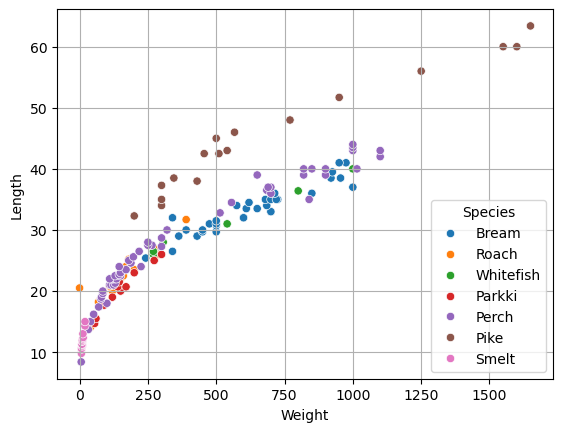

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=fish, x = "Weight", y = "Length", hue = "Species")
plt.grid()
plt.show()

In [29]:
# 문제집과 정답지 만들기

X = fish[["Weight", "Length"]].values       # 문제집   -   weight, length로만 
Y = fish["Species"].values                  # 정답지

# 1. 모델 구축 

In [30]:
# KNN분류모델 만들기
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [31]:
# KNN분류모델 학습
model.fit(X, Y)

KNeighborsClassifier()

In [32]:
# 분류모델의 성능 확인하기
model.score(X, Y)

# 69.18%

0.6918238993710691

# 2. 데이터 분할 

In [42]:
# 훈련데이터:시험데이터 = 8:2로 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)
                                                        # 시험데이터에게 20%를 할당하겠다

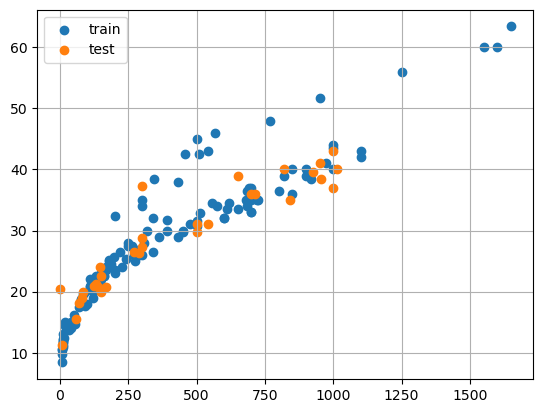

In [43]:
plt.scatter(train_x[:, 0], train_x[:, 1])     # 훈련데이터의 전체 범위에 대해 length, weight 표시
plt.scatter(test_x[:, 0], test_x[:, 1])     # 시험데이터의 전체 범위에 대해 length, weight 표시
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 3. 거리 계산 방법 평가

In [44]:
len(train_x), len(test_x)

(127, 32)

In [45]:
# 훈련데이터로 학습
model = KNeighborsClassifier()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.5625

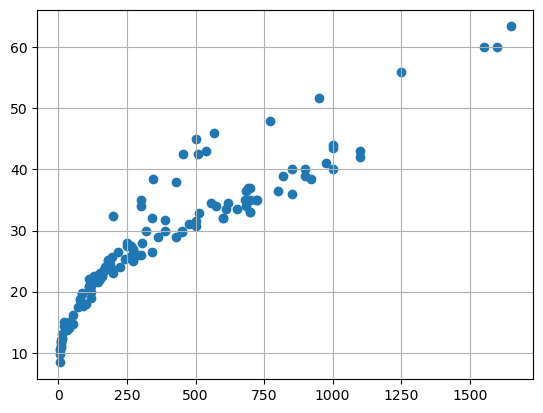

In [47]:
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.grid()
plt.show()

In [53]:
# 데이터 표준화  
mean = train_x.mean(axis = 0)     # 무게데이터와 길이데이터의 평균 구해줌
std = train_x.std(axis = 0)       # 표준편차

In [54]:
train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std     

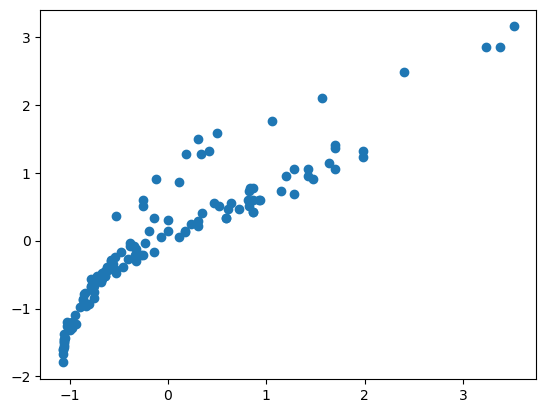

In [55]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.show()

In [60]:
# 표준화한 데이터를 기반으로 다시 학습

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.625

In [61]:
# 유클리드 거리
model = KNeighborsClassifier(metric = "euclidean")
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.625

In [59]:
# 맨해튼 거리
model = KNeighborsClassifier(metric = "manhattan") 
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.5625

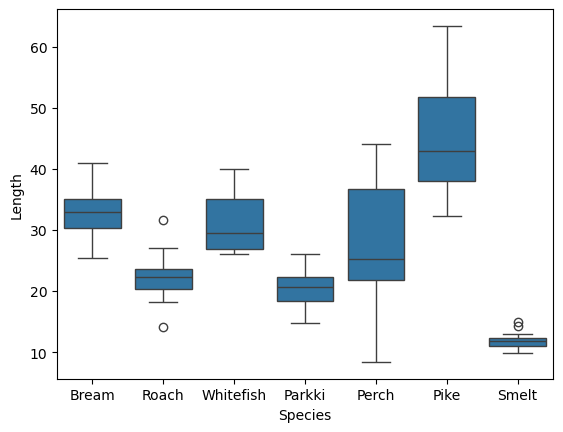

In [64]:
# 데이터 표준화 - Z-Score 표준화 방법 (평균 0, 표준편차 1)

sns.boxplot(data=fish, x="Species", y="Length")
plt.show()

In [67]:
# Robust Scaler
import numpy as np

median = np.median(train_x, axis = 0)  
IQR = np.quantile(train_x, 0.75, axis = 0) - np.quantile(train_x, 0.25, axis = 0)  

train_scaled = (train_x - median) / IQR
test_scaled = (test_x - median) / IQR

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.625

In [68]:
# MinMax
min_value = train_x.min(axis = 0)
max_value = train_x.max(axis = 0)

train_scaled = (train_x - min_value) / (max_value - min_value)
test_scaled = (test_x - min_value) / (max_value - min_value)

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.625

맨해튼 거리의 성능은 0.5625이고, 유클리드 거리의 성능은 0.625로, 유클리드 거리의 성능이 더 좋았다

# 4. 최적 이웃 수(k) 평가 

In [74]:
model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

model.n_neighbors = 1 
score = model.score(test_scaled, test_y)
score

0.4375

In [75]:
model.n_neighbors = 2
score = model.score(test_scaled, test_y)
score

0.65625

In [79]:
model.n_neighbors = 5
score = model.score(test_scaled, test_y)
score

0.625

In [85]:
model.n_neighbors = 10
score = model.score(test_scaled, test_y)
score

0.46875

In [86]:
model.n_neighbors = 50
score = model.score(test_scaled, test_y)
score

0.46875

# 5. 최적 모델 도출을 위한 시뮬레이션

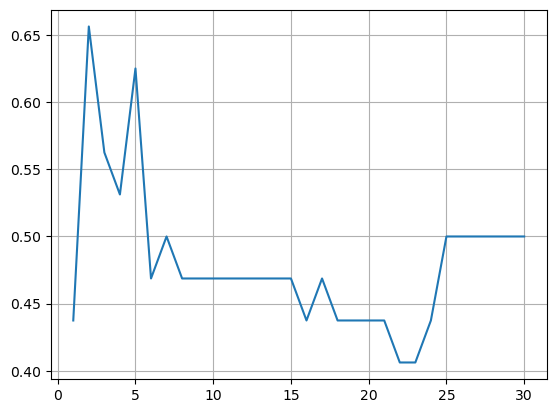

In [90]:
# 유클리드 거리에 대한 시뮬레이션

model = KNeighborsClassifier(metric = "euclidean")
model.fit(train_scaled, train_y)
box = []
for n in range(1, 31):
    model.n_neighbors = n 
    score = model.score(test_scaled, test_y)
    box.append(score)
plt.plot(range(1,31), box)
plt.grid()
plt.show()

# k=2일때 가장 성능이 좋았다

In [92]:
box[1]

# k=2일때의 성능은 65.6%

0.65625

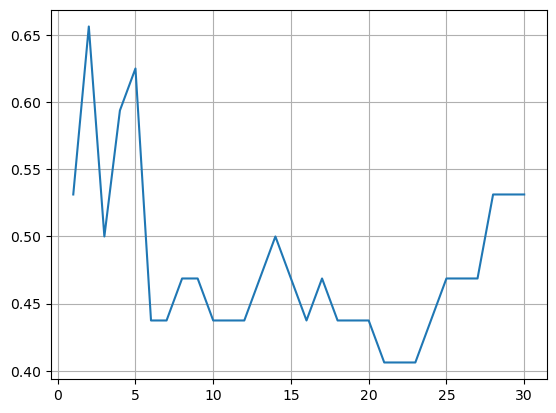

In [93]:
# 맨해튼 거리에 대한 시뮬레이션

model = KNeighborsClassifier(metric = "manhattan") 
model.fit(train_scaled, train_y)
box=[]
for n in range(1, 31):
    model.n_neighbors = n 
    score = model.score(test_scaled, test_y)
    box.append(score)
plt.plot(range(1,31), box)
plt.grid()
plt.show()

# k=2일때 가장 성능이 좋았다

In [94]:
box[1]

# k=2일때의 성능은 65.6%

0.65625

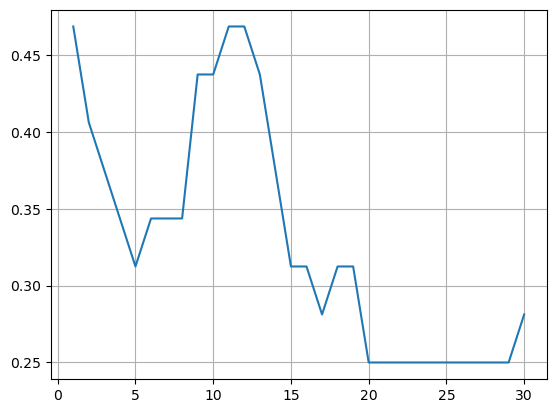

In [98]:
# Robust Scaler에 대한 시뮬레이션

from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
train_scaled = rb.fit_transform(train_x)

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
box = []
for n in range(1, 31):
    model.n_neighbors = n 
    score = model.score(test_scaled, test_y)
    box.append(score)
plt.plot(range(1,31), box)
plt.grid()
plt.show()

# k=11, 12일때 가장 성능이 좋았다

In [102]:
box[10]

# k=11,12일때의 성능은 46.9%

0.46875

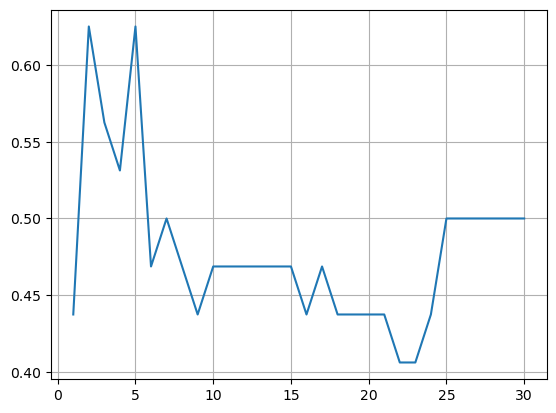

In [103]:
# MinMax 방식에 대한 시뮬레이션
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()  
train_scaled = mm.fit_transform(train_x)

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
box = []
for n in range(1, 31): 
    model.n_neighbors = n 
    score = model.score(test_scaled, test_y)
    box.append(score)
plt.plot(range(1,31), box)
plt.grid()
plt.show()

# k=2, 5일때 가장 성능이 좋았다

In [104]:
box[1]

# k=2,5일때의 성능은 62.5%

0.625

In [109]:
model.n_neighbors = 2

유클리드 거리와 맨해튼 거리 계산 방식을 이용했을 때의 정확도가 0.65625로 가장 높게 나타났고, 이때의 이웃수는 k=2이다

# 6. 모델 성능 분석

In [110]:
# 유클리드 거리를 이용한 모델의 성능 분석
model = KNeighborsClassifier(metric = "euclidean")
model.fit(train_scaled, train_y) 

KNeighborsClassifier(metric='euclidean')

In [111]:
pred = model.predict(test_scaled)  

In [112]:
from sklearn.metrics import classification_report
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

       Bream       0.70      0.88      0.78         8
      Parkki       0.50      0.25      0.33         4
       Perch       0.75      0.64      0.69        14
        Pike       1.00      1.00      1.00         1
       Roach       0.17      0.50      0.25         2
       Smelt       1.00      1.00      1.00         1
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.62        32
   macro avg       0.59      0.61      0.58        32
weighted avg       0.64      0.62      0.62        32



정밀도가 가장 높은 물고기 종은 1.00의 정밀도를 갖는 Pike와 Smelt이고, 정밀도가 가장 낮은 물고기 종은 0.00의 정밀도를 갖는 Smelt이다.  
- Pike와 Smelt는 데이터가 적어서 예측이 쉬워 결과적으로 높은 정밀도를 기록하였고,
Whitefish는 매우 적은 샘플 수 때문에 모델이 제대로 학습하지 못해 정밀도가 0.00으로 나타난 것이라 판단된다.